In [1]:
import pandas as pd               # уже знакомый вам пакет для работы с таблицами
import numpy as np                # смутно знакомый вам пакет для работы с матрицами
import matplotlib.pyplot as plt   # уже знакомый вам пакет для картинок 
import seaborn as sns             # ещё один пакет для картинок 

%matplotlib inline

In [2]:
df=pd.read_csv('./AB_NYC_2019.csv', index_col='id')
print(df.shape)
df.head(2)

(48895, 15)


name  host_id host_name  \
id                                                            
2539  Clean & quiet apt home by the park     2787      John   
2595               Skylit Midtown Castle     2845  Jennifer   

     neighbourhood_group neighbourhood  latitude  longitude        room_type  \
id                                                                             
2539            Brooklyn    Kensington  40.64749  -73.97237     Private room   
2595           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   

      price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
id                                                                              
2539    149               1                  9  2018-10-19               0.21   
2595    225               1                 45  2019-05-21               0.38   

      calculated_host_listings_count  availability_365  
id                                                      
2539                               6               365  
2595                               2               355

In [3]:
# по условиям задачи исключаем признаки:
print(df.columns.values)
print(df.columns.values.size)
print()
df = df.drop(columns=["name", "host_id", "host_name", "last_review"])
print(df.columns.values)
print(df.columns.values.size)

['name' 'host_id' 'host_name' 'neighbourhood_group' 'neighbourhood'
 'latitude' 'longitude' 'room_type' 'price' 'minimum_nights'
 'number_of_reviews' 'last_review' 'reviews_per_month'
 'calculated_host_listings_count' 'availability_365']
15

['neighbourhood_group' 'neighbourhood' 'latitude' 'longitude' 'room_type'
 'price' 'minimum_nights' 'number_of_reviews' 'reviews_per_month'
 'calculated_host_listings_count' 'availability_365']
11


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 2539 to 36487245
Data columns (total 11 columns):
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(3), int64(5), object(3)
memory usage: 4.5+ MB


In [5]:
# смотрим на object'ы:
objects = df.loc[:, df.dtypes == np.object]
objects.head(5)

neighbourhood_group neighbourhood        room_type
id                                                     
2539            Brooklyn    Kensington     Private room
2595           Manhattan       Midtown  Entire home/apt
3647           Manhattan        Harlem     Private room
3831            Brooklyn  Clinton Hill  Entire home/apt
5022           Manhattan   East Harlem  Entire home/apt

In [6]:
# похоже на категориальные признаки. Уникальных "neighbourhood" очень много, возможно их в дальнейшем уберем.
for j in objects.columns.values: 
    print(j+":", np.unique(df[j]).size)

neighbourhood_group: 5
neighbourhood: 221
room_type: 3


In [7]:
# а пока что преобразуем все многообразие каждого признака в отдельный признак:
print(pd.get_dummies(df["neighbourhood_group"], drop_first=False, prefix="neighbourhood_group").columns)
print(pd.get_dummies(df["neighbourhood"], drop_first=False, prefix="neighbourhood_region").columns)
print(pd.get_dummies(df["room_type"], drop_first=False, prefix="room_type").columns)

Index(['neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island'],
      dtype='object')
Index(['neighbourhood_region_Allerton', 'neighbourhood_region_Arden Heights',
       'neighbourhood_region_Arrochar', 'neighbourhood_region_Arverne',
       'neighbourhood_region_Astoria', 'neighbourhood_region_Bath Beach',
       'neighbourhood_region_Battery Park City',
       'neighbourhood_region_Bay Ridge', 'neighbourhood_region_Bay Terrace',
       'neighbourhood_region_Bay Terrace, Staten Island',
       ...
       'neighbourhood_region_Westerleigh', 'neighbourhood_region_Whitestone',
       'neighbourhood_region_Williamsbridge',
       'neighbourhood_region_Williamsburg', 'neighbourhood_region_Willowbrook',
       'neighbourhood_region_Windsor Terrace',
       'neighbourhood_region_Woodhaven', 'neighbourhood_region_Woodlawn',
       'neighbourhood_region_Woodrow', 'neighbourho

In [8]:
neighbourhood_group_classes = pd.get_dummies(df["neighbourhood_group"], drop_first=False, prefix="neighbourhood_group")
neighbourhood_classes = pd.get_dummies(df["neighbourhood"], drop_first=False, prefix="neighbourhood_region")
room_type_classes = pd.get_dummies(df["room_type"], drop_first=False, prefix="room_type")

df = pd.concat([df.drop("neighbourhood_group", axis=1), neighbourhood_group_classes], axis=1)
df = pd.concat([df.drop("neighbourhood", axis=1), neighbourhood_classes], axis=1)
df = pd.concat([df.drop("room_type", axis=1), room_type_classes], axis=1)

df.head()

latitude  longitude  price  minimum_nights  number_of_reviews  \
id                                                                    
2539  40.64749  -73.97237    149               1                  9   
2595  40.75362  -73.98377    225               1                 45   
3647  40.80902  -73.94190    150               3                  0   
3831  40.68514  -73.95976     89               1                270   
5022  40.79851  -73.94399     80              10                  9   

      reviews_per_month  calculated_host_listings_count  availability_365  \
id                                                                          
2539               0.21                               6               365   
2595               0.38                               2               355   
3647                NaN                               1               365   
3831               4.64                               1               194   
5022               0.10                               1                 0   

      neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  ...  \
id                                                             ...   
2539                          0                             1  ...   
2595                          0                             0  ...   
3647                          0                             0  ...   
3831                          0                             1  ...   
5022                          0                             0  ...   

      neighbourhood_region_Williamsburg  neighbourhood_region_Willowbrook  \
id                                                                          
2539                                  0                                 0   
2595                                  0                                 0   
3647                                  0                                 0   
3831                                  0                                 0   
5022                                  0                                 0   

      neighbourhood_region_Windsor Terrace  neighbourhood_region_Woodhaven  \
id                                                                           
2539                                     0                               0   
2595                                     0                               0   
3647                                     0                               0   
3831                                     0                               0   
5022                                     0                               0   

      neighbourhood_region_Woodlawn  neighbourhood_region_Woodrow  \
id                                                                  
2539                              0                             0   
2595                              0                             0   
3647                              0                             0   
3831                              0                             0   
5022                              0                             0   

      neighbourhood_region_Woodside  room_type_Entire home/apt  \
id                                                               
2539                              0                          0   
2595                              0                          1   
3647                              0                          0   
3831                              0                          1   
5022                              0                          1   

      room_type_Private room  room_type_Shared room  
id                                                   
2539                       1                      0  
2595                       0                      0  
3647                       1                      0  
3831                       0                      0  
5022                       0                      0  

[5 rows x 237 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 2539 to 36487245
Columns: 237 entries, latitude to room_type_Shared room
dtypes: float64(3), int64(5), uint8(229)
memory usage: 14.0 MB


In [10]:
# теперь смотрим на числа
df.isnull().sum()
# нужно увидеть все не-цифровые значения. Тут их не видно.

latitude                         0
longitude                        0
price                            0
minimum_nights                   0
number_of_reviews                0
                                ..
neighbourhood_region_Woodrow     0
neighbourhood_region_Woodside    0
room_type_Entire home/apt        0
room_type_Private room           0
room_type_Shared room            0
Length: 237, dtype: int64

In [11]:
# не знаю как сделать быстро, поэтому делаю просто:
#a = []
#for j in range(df.isnull().sum().size): 
#    a.append([df.isnull().sum().index[j], df.isnull().sum().values[j]]) # это очень долго, хз почему
#for j in a: 
#    if j[1] != 0:
#        print(j) 

In [12]:
# вот это работает мгновенно
for j in df.isnull().sum().to_numpy().nonzero():
    print(df.isnull().sum()[j])

reviews_per_month    10052
dtype: int64


In [13]:
# меняем все NaN в reviews_per_month на 0:
df["reviews_per_month"] = df["reviews_per_month"].fillna(0)
for j in df.isnull().sum().to_numpy().nonzero():
    print(df.isnull().sum()[j])

Series([], dtype: int64)


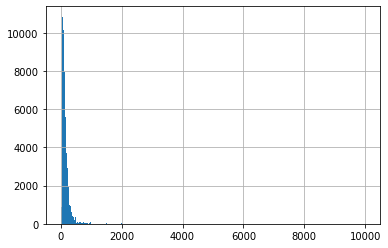

In [14]:
df.price.hist(bins=300)

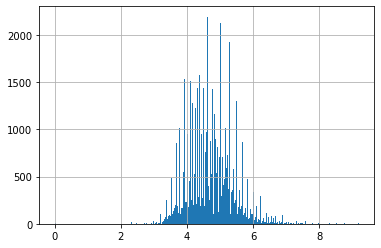

In [15]:
# очень длинный хвост, посмотрим поближе
# логарифмируем, вдруг поможет
df_log = df.copy(deep=True) # иначе данные в оригинальном фрейме меняются
df_log.loc[df_log["price"] < 1, "price"] = 1
df_log["price"] = np.log(df_log["price"])
df_log.price.hist(bins=300)

In [16]:
df_log.describe()

latitude     longitude         price  minimum_nights  \
count  48895.000000  48895.000000  48895.000000    48895.000000   
mean      40.728949    -73.952170      4.725967        7.029962   
std        0.054530      0.046157      0.701737       20.510550   
min       40.499790    -74.244420      0.000000        1.000000   
25%       40.690100    -73.983070      4.234107        1.000000   
50%       40.723070    -73.955680      4.663439        3.000000   
75%       40.763115    -73.936275      5.164786        5.000000   
max       40.913060    -73.712990      9.210340     1250.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       48895.000000       48895.000000                    48895.000000   
mean           23.274466           1.090910                        7.143982   
std            44.550582           1.597283                       32.952519   
min             0.000000           0.000000                        1.000000   
25%             1.000000           0.040000                        1.000000   
50%             5.000000           0.370000                        1.000000   
75%            24.000000           1.580000                        2.000000   
max           629.000000          58.500000                      327.000000   

       availability_365  neighbourhood_group_Bronx  \
count      48895.000000               48895.000000   
mean         112.781327                   0.022313   
std          131.622289                   0.147701   
min            0.000000                   0.000000   
25%            0.000000                   0.000000   
50%           45.000000                   0.000000   
75%          227.000000                   0.000000   
max          365.000000                   1.000000   

       neighbourhood_group_Brooklyn  ...  neighbourhood_region_Williamsburg  \
count                  48895.000000  ...                       48895.000000   
mean                       0.411167  ...                           0.080172   
std                        0.492050  ...                           0.271562   
min                        0.000000  ...                           0.000000   
25%                        0.000000  ...                           0.000000   
50%                        0.000000  ...                           0.000000   
75%                        1.000000  ...                           0.000000   
max                        1.000000  ...                           1.000000   

       neighbourhood_region_Willowbrook  neighbourhood_region_Windsor Terrace  \
count                      48895.000000                          48895.000000   
mean                           0.000020                              0.003211   
std                            0.004522                              0.056575   
min                            0.000000                              0.000000   
25%                            0.000000                              0.000000   
50%                            0.000000                              0.000000   
75%                            0.000000                              0.000000   
max                            1.000000                              1.000000   

       neighbourhood_region_Woodhaven  neighbourhood_region_Woodlawn  \
count                    48895.000000                   48895.000000   
mean                         0.001800                       0.000225   
std                          0.042386                       0.014998   
min                          0.000000                       0.000000   
25%                          0.000000                       0.000000   
50%                          0.000000                       0.000000   
75%                          0.000000                       0.000000   
max                          1.000000                       1.000000   

       neighbourhood_region_Woodrow  neighbourhood_region_Woodside  \
count                  48895.000000            

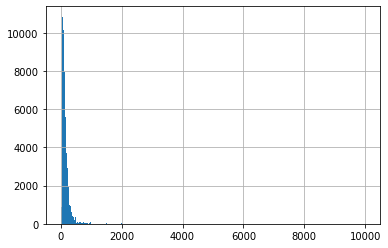

In [17]:
df.price.hist(bins=300)

In [18]:
df.describe()

latitude     longitude         price  minimum_nights  \
count  48895.000000  48895.000000  48895.000000    48895.000000   
mean      40.728949    -73.952170    152.720687        7.029962   
std        0.054530      0.046157    240.154170       20.510550   
min       40.499790    -74.244420      0.000000        1.000000   
25%       40.690100    -73.983070     69.000000        1.000000   
50%       40.723070    -73.955680    106.000000        3.000000   
75%       40.763115    -73.936275    175.000000        5.000000   
max       40.913060    -73.712990  10000.000000     1250.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       48895.000000       48895.000000                    48895.000000   
mean           23.274466           1.090910                        7.143982   
std            44.550582           1.597283                       32.952519   
min             0.000000           0.000000                        1.000000   
25%             1.000000           0.040000                        1.000000   
50%             5.000000           0.370000                        1.000000   
75%            24.000000           1.580000                        2.000000   
max           629.000000          58.500000                      327.000000   

       availability_365  neighbourhood_group_Bronx  \
count      48895.000000               48895.000000   
mean         112.781327                   0.022313   
std          131.622289                   0.147701   
min            0.000000                   0.000000   
25%            0.000000                   0.000000   
50%           45.000000                   0.000000   
75%          227.000000                   0.000000   
max          365.000000                   1.000000   

       neighbourhood_group_Brooklyn  ...  neighbourhood_region_Williamsburg  \
count                  48895.000000  ...                       48895.000000   
mean                       0.411167  ...                           0.080172   
std                        0.492050  ...                           0.271562   
min                        0.000000  ...                           0.000000   
25%                        0.000000  ...                           0.000000   
50%                        0.000000  ...                           0.000000   
75%                        1.000000  ...                           0.000000   
max                        1.000000  ...                           1.000000   

       neighbourhood_region_Willowbrook  neighbourhood_region_Windsor Terrace  \
count                      48895.000000                          48895.000000   
mean                           0.000020                              0.003211   
std                            0.004522                              0.056575   
min                            0.000000                              0.000000   
25%                            0.000000                              0.000000   
50%                            0.000000                              0.000000   
75%                            0.000000                              0.000000   
max                            1.000000                              1.000000   

       neighbourhood_region_Woodhaven  neighbourhood_region_Woodlawn  \
count                    48895.000000                   48895.000000   
mean                         0.001800                       0.000225   
std                          0.042386                       0.014998   
min                          0.000000                       0.000000   
25%                          0.000000                       0.000000   
50%                          0.000000                       0.000000   
75%                          0.000000                       0.000000   
max                          1.000000                       1.000000   

       neighbourhood_region_Woodrow  neighbourhood_region_Woodside  \
count                  48895.000000            

In [19]:
# уже лучше чем было, но все еще не очень
len(df[df["price"]>0].index) # всего объектов

48884

In [20]:
# отбросим несколько самых высоких значений цен
len(df[df["price"]>0].index) * 0.28 / 100 # вот столько

136.8752

In [21]:
df_reduced = df.copy(deep=True)
df_reduced.loc[df_reduced["price"] < 1, "price"] = 1
df_reduced.sort_values(by="price").tail(5)

latitude  longitude  price  minimum_nights  number_of_reviews  \
id                                                                        
31340283  40.71980  -73.98566   9999              30                  0   
9528920   40.71355  -73.98507   9999              99                  6   
13894339  40.73260  -73.95739  10000               5                  5   
7003697   40.76810  -73.91651  10000             100                  2   
22436899  40.77213  -73.98665  10000              30                  0   

          reviews_per_month  calculated_host_listings_count  availability_365  \
id                                                                              
31340283               0.00                               1               365   
9528920                0.14                               1                83   
13894339               0.16                               1                 0   
7003697                0.04                               1                 0   
22436899               0.00                               1                83   

          neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  ...  \
id                                                                 ...   
31340283                          0                             0  ...   
9528920                           0                             0  ...   
13894339                          0                             1  ...   
7003697                           0                             0  ...   
22436899                          0                             0  ...   

          neighbourhood_region_Williamsburg  neighbourhood_region_Willowbrook  \
id                                                                              
31340283                                  0                                 0   
9528920                                   0                                 0   
13894339                                  0                                 0   
7003697                                   0                                 0   
22436899                                  0                                 0   

          neighbourhood_region_Windsor Terrace  \
id                                               
31340283                                     0   
9528920                                      0   
13894339                                     0   
7003697                                      0   
22436899                                     0   

          neighbourhood_region_Woodhaven  neighbourhood_region_Woodlawn  \
id                                                                        
31340283                               0                              0   
9528920                                0                              0   
13894339                               0                              0   
7003697                                0                              0   
22436899                               0                              0   

          neighbourhood_region_Woodrow  neighbourhood_region_Woodside  \
id                                                                      
31340283                             0                              0   
9528920                              0                              0   
13894339                             0                              0   
7003697                              0                              0   
22436899                             0                              0   

          room_type_Entire home/apt  room_type_Private room  \
id                                                            
31340283                          1                       0   
9528920                           0                       1   
13894339                          1                       0   
7003697                           0                       1   
22436899                          1                       0   

In [22]:
df_reduced.drop(df_reduced.sort_values(by="price").tail(136).index, inplace=True)
df_reduced.sort_values(by="price").tail(5)

latitude  longitude  price  minimum_nights  number_of_reviews  \
id                                                                        
2276065   40.75225  -73.98725   1500               1                  0   
15392689  40.80242  -73.94215   1500               4                  1   
2250372   40.74422  -73.97822   1550               2                  0   
19013613  40.73983  -74.00586   1599              30                  6   
16087406  40.75368  -73.97358   1599               3                  2   

          reviews_per_month  calculated_host_listings_count  availability_365  \
id                                                                              
2276065                0.00                               1                 0   
15392689               0.18                               5               188   
2250372                0.00                               1                 0   
19013613               0.24                               1                 0   
16087406               0.08                              12               365   

          neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  ...  \
id                                                                 ...   
2276065                           0                             0  ...   
15392689                          0                             0  ...   
2250372                           0                             0  ...   
19013613                          0                             0  ...   
16087406                          0                             0  ...   

          neighbourhood_region_Williamsburg  neighbourhood_region_Willowbrook  \
id                                                                              
2276065                                   0                                 0   
15392689                                  0                                 0   
2250372                                   0                                 0   
19013613                                  0                                 0   
16087406                                  0                                 0   

          neighbourhood_region_Windsor Terrace  \
id                                               
2276065                                      0   
15392689                                     0   
2250372                                      0   
19013613                                     0   
16087406                                     0   

          neighbourhood_region_Woodhaven  neighbourhood_region_Woodlawn  \
id                                                                        
2276065                                0                              0   
15392689                               0                              0   
2250372                                0                              0   
19013613                               0                              0   
16087406                               0                              0   

          neighbourhood_region_Woodrow  neighbourhood_region_Woodside  \
id                                                                      
2276065                              0                              0   
15392689                             0                              0   
2250372                              0                              0   
19013613                             0                              0   
16087406                             0                              0   

          room_type_Entire home/apt  room_type_Private room  \
id                                                            
2276065                           1                       0   
15392689                          0                       1   
2250372                           1                       0   
19013613                          1                       0   
16087406                          0                       1   

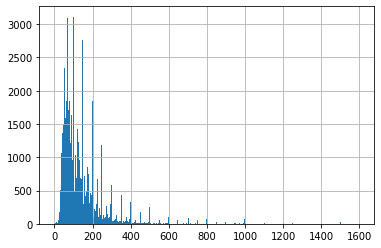

In [23]:
df_reduced.price.hist(bins=300)

In [24]:
df_reduced.describe()

latitude     longitude         price  minimum_nights  \
count  48759.000000  48759.000000  48759.000000    48759.000000   
mean      40.728939    -73.952104    143.716729        6.983900   
std        0.054552      0.046168    128.318970       20.327114   
min       40.499790    -74.244420      1.000000        1.000000   
25%       40.690060    -73.983015     69.000000        1.000000   
50%       40.723030    -73.955640    105.000000        3.000000   
75%       40.763110    -73.936180    175.000000        5.000000   
max       40.913060    -73.712990   1599.000000     1250.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       48759.000000       48759.000000                    48759.000000   
mean           23.326012           1.093216                        7.155910   
std            44.597344           1.598428                       32.997127   
min             0.000000           0.000000                        1.000000   
25%             1.000000           0.040000                        1.000000   
50%             5.000000           0.370000                        1.000000   
75%            24.000000           1.590000                        2.000000   
max           629.000000          58.500000                      327.000000   

       availability_365  neighbourhood_group_Bronx  \
count      48759.000000               48759.000000   
mean         112.576058                   0.022355   
std          131.509714                   0.147836   
min            0.000000                   0.000000   
25%            0.000000                   0.000000   
50%           45.000000                   0.000000   
75%          226.000000                   0.000000   
max          365.000000                   1.000000   

       neighbourhood_group_Brooklyn  ...  neighbourhood_region_Williamsburg  \
count                  48759.000000  ...                       48759.000000   
mean                       0.411616  ...                           0.080293   
std                        0.492131  ...                           0.271749   
min                        0.000000  ...                           0.000000   
25%                        0.000000  ...                           0.000000   
50%                        0.000000  ...                           0.000000   
75%                        1.000000  ...                           0.000000   
max                        1.000000  ...                           1.000000   

       neighbourhood_region_Willowbrook  neighbourhood_region_Windsor Terrace  \
count                      48759.000000                          48759.000000   
mean                           0.000021                              0.003220   
std                            0.004529                              0.056653   
min                            0.000000                              0.000000   
25%                            0.000000                              0.000000   
50%                            0.000000                              0.000000   
75%                            0.000000                              0.000000   
max                            1.000000                              1.000000   

       neighbourhood_region_Woodhaven  neighbourhood_region_Woodlawn  \
count                    48759.000000                   48759.000000   
mean                         0.001805                       0.000226   
std                          0.042445                       0.015018   
min                          0.000000                       0.000000   
25%                          0.000000                       0.000000   
50%                          0.000000                       0.000000   
75%                          0.000000                       0.000000   
max                          1.000000                       1.000000   

       neighbourhood_region_Woodrow  neighbourhood_region_Woodside  \
count                  48759.000000            

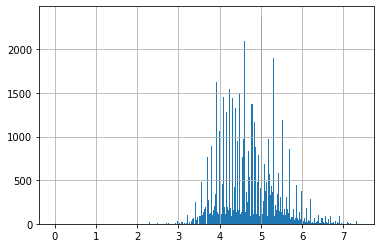

In [25]:
df_reduced_log = df_reduced.copy(deep=True)
df_reduced_log["price"] = np.log(df_reduced_log["price"])
df_reduced_log.price.hist(bins=300)

In [26]:
df_reduced_log.describe()

latitude     longitude         price  minimum_nights  \
count  48759.000000  48759.000000  48759.000000    48759.000000   
mean      40.728939    -73.952104      4.716876        6.983900   
std        0.054552      0.046168      0.680742       20.327114   
min       40.499790    -74.244420      0.000000        1.000000   
25%       40.690060    -73.983015      4.234107        1.000000   
50%       40.723030    -73.955640      4.653960        3.000000   
75%       40.763110    -73.936180      5.164786        5.000000   
max       40.913060    -73.712990      7.377134     1250.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       48759.000000       48759.000000                    48759.000000   
mean           23.326012           1.093216                        7.155910   
std            44.597344           1.598428                       32.997127   
min             0.000000           0.000000                        1.000000   
25%             1.000000           0.040000                        1.000000   
50%             5.000000           0.370000                        1.000000   
75%            24.000000           1.590000                        2.000000   
max           629.000000          58.500000                      327.000000   

       availability_365  neighbourhood_group_Bronx  \
count      48759.000000               48759.000000   
mean         112.576058                   0.022355   
std          131.509714                   0.147836   
min            0.000000                   0.000000   
25%            0.000000                   0.000000   
50%           45.000000                   0.000000   
75%          226.000000                   0.000000   
max          365.000000                   1.000000   

       neighbourhood_group_Brooklyn  ...  neighbourhood_region_Williamsburg  \
count                  48759.000000  ...                       48759.000000   
mean                       0.411616  ...                           0.080293   
std                        0.492131  ...                           0.271749   
min                        0.000000  ...                           0.000000   
25%                        0.000000  ...                           0.000000   
50%                        0.000000  ...                           0.000000   
75%                        1.000000  ...                           0.000000   
max                        1.000000  ...                           1.000000   

       neighbourhood_region_Willowbrook  neighbourhood_region_Windsor Terrace  \
count                      48759.000000                          48759.000000   
mean                           0.000021                              0.003220   
std                            0.004529                              0.056653   
min                            0.000000                              0.000000   
25%                            0.000000                              0.000000   
50%                            0.000000                              0.000000   
75%                            0.000000                              0.000000   
max                            1.000000                              1.000000   

       neighbourhood_region_Woodhaven  neighbourhood_region_Woodlawn  \
count                    48759.000000                   48759.000000   
mean                         0.001805                       0.000226   
std                          0.042445                       0.015018   
min                          0.000000                       0.000000   
25%                          0.000000                       0.000000   
50%                          0.000000                       0.000000   
75%                          0.000000                       0.000000   
max                          1.000000                       1.000000   

       neighbourhood_region_Woodrow  neighbourhood_region_Woodside  \
count                  48759.000000            

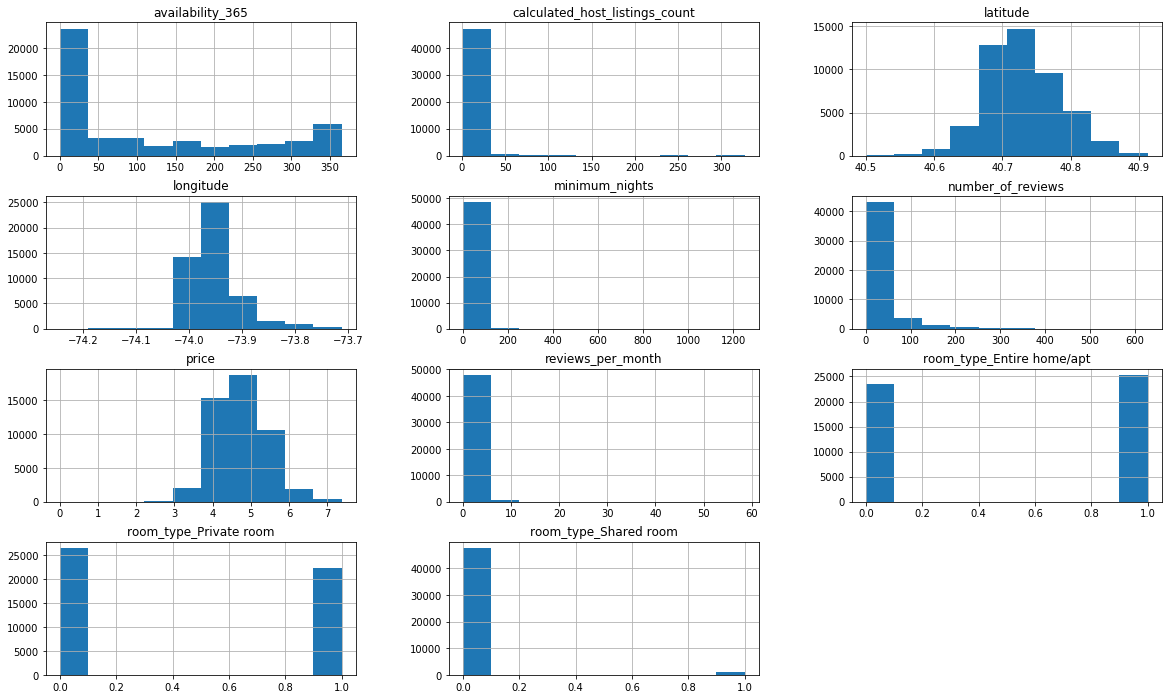

In [27]:
# оставляем, уже терпимо
# дальше гистограммы и корреляции
#df_reduced_log.drop("price",axis=1).hist(figsize=(20, 12));
hist_list = df_reduced_log.drop(df_reduced_log.filter(regex="neighbourhood_").columns,axis=1)
hist_list.hist(figsize=(20, 12));

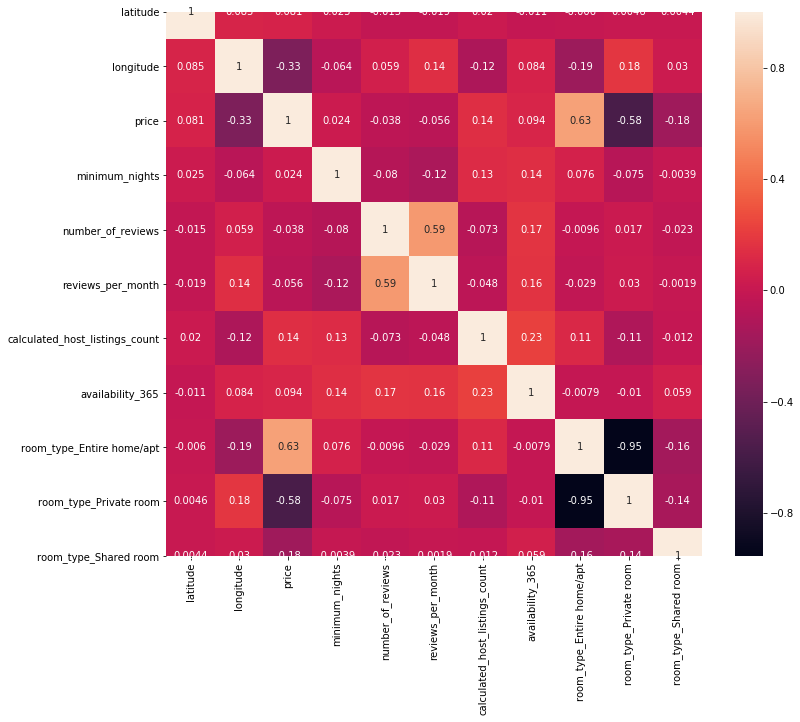

In [28]:
# room_type_Shared room несбалансирована
plt.figure(figsize=(12, 10))
sns.heatmap(hist_list.corr(), annot=True);

In [29]:
correlations = hist_list.corr()
used_corr_index = []
interesting_corr_index=[]
for i in correlations:
    for j in correlations.index[correlations[i].abs() > 0.5]:
        # if i != j and i not in used_corr_index and j not in used_corr_index:
        if i != j and [i,j] not in used_corr_index and [j,i] not in used_corr_index:
        #if i != j and [i,j] not in used_corr_index:
            used_corr_index.append([i,j])
            print(correlations[i][correlations.index == j].values[0], "  ", i, "  ", j )
            interesting_corr_index.append([i,j,correlations[i][correlations.index == j].values[0]])


0.6278549425404563    price    room_type_Entire home/apt
-0.5754549096666434    price    room_type_Private room
0.5892082204214104    number_of_reviews    reviews_per_month
-0.9533909408751504    room_type_Entire home/apt    room_type_Private room


['price', 'room_type_Entire home/apt', 0.6278549425404563]
['price', 'room_type_Private room', -0.5754549096666434]
['number_of_reviews', 'reviews_per_month', 0.5892082204214104]
['room_type_Entire home/apt', 'room_type_Private room', -0.9533909408751504]


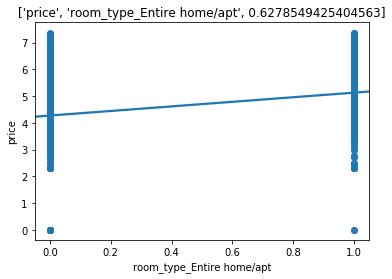

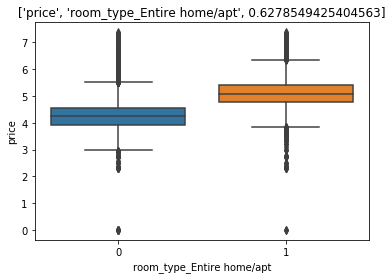

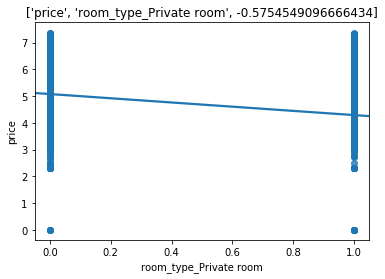

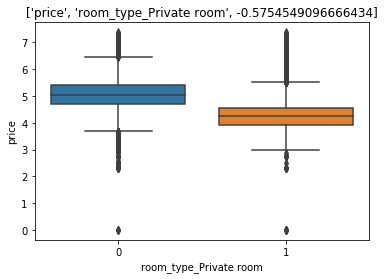

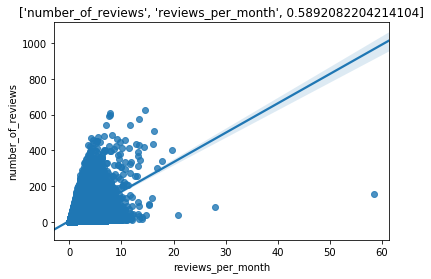

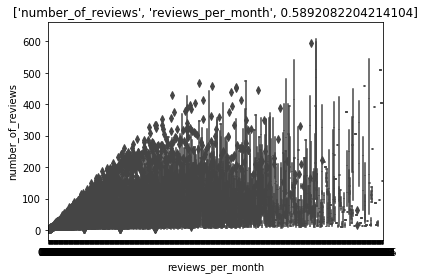

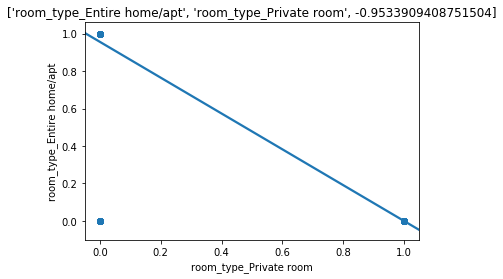

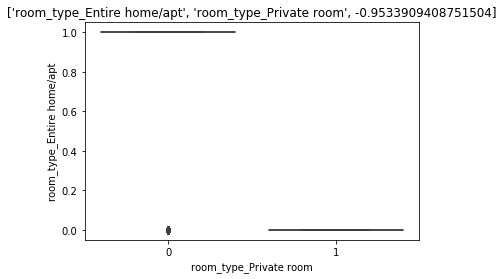

In [30]:
data = df_reduced_log.drop(df_reduced_log.filter(regex="neighbourhood_").columns,axis=1)
for one in interesting_corr_index:
    print(one)
    plt.figure()
    plt.title(one)
    sns.regplot(x=one[1], y=one[0], data=data)
    plt.figure()
    plt.title(one)
    sns.boxplot(x=one[1], y=one[0], data=data)
    

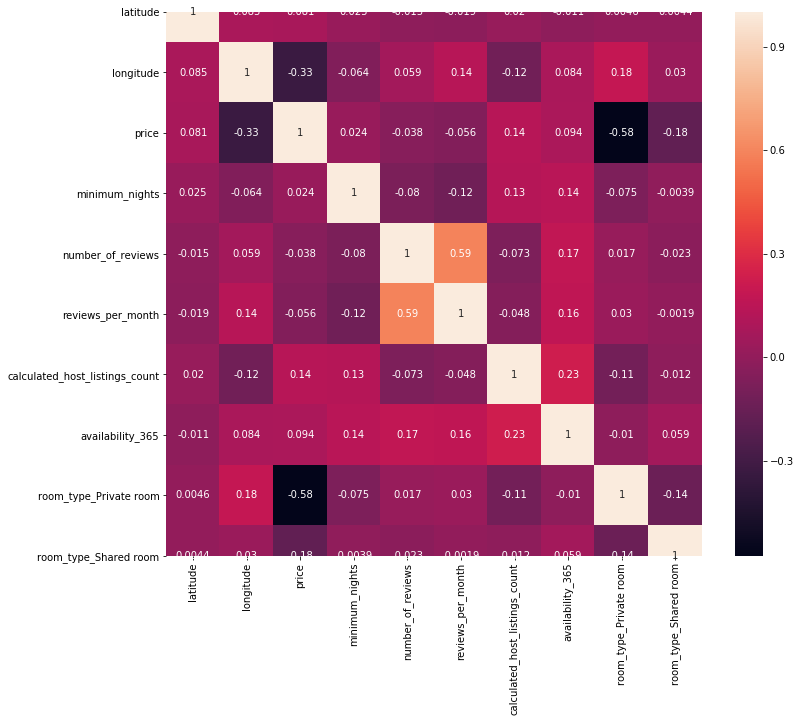

In [31]:
# "room_type_Entire home/apt" кандидат на дроп, сильно коррелирует с двумя другими признаками
# при этом room_type_Shared room" несбалансирована, в то время как Private/Shared сбалансированы гораздо лучше
# сначала пробуем убрать "room_type_Entire home/apt"
df_reduced_log_entire = df_reduced_log.drop("room_type_Entire home/apt", axis=1)
hist_list = df_reduced_log_entire.drop(df_reduced_log_entire.filter(regex="neighbourhood_").columns,axis=1)
plt.figure(figsize=(12, 10))
sns.heatmap(hist_list.corr(), annot=True);

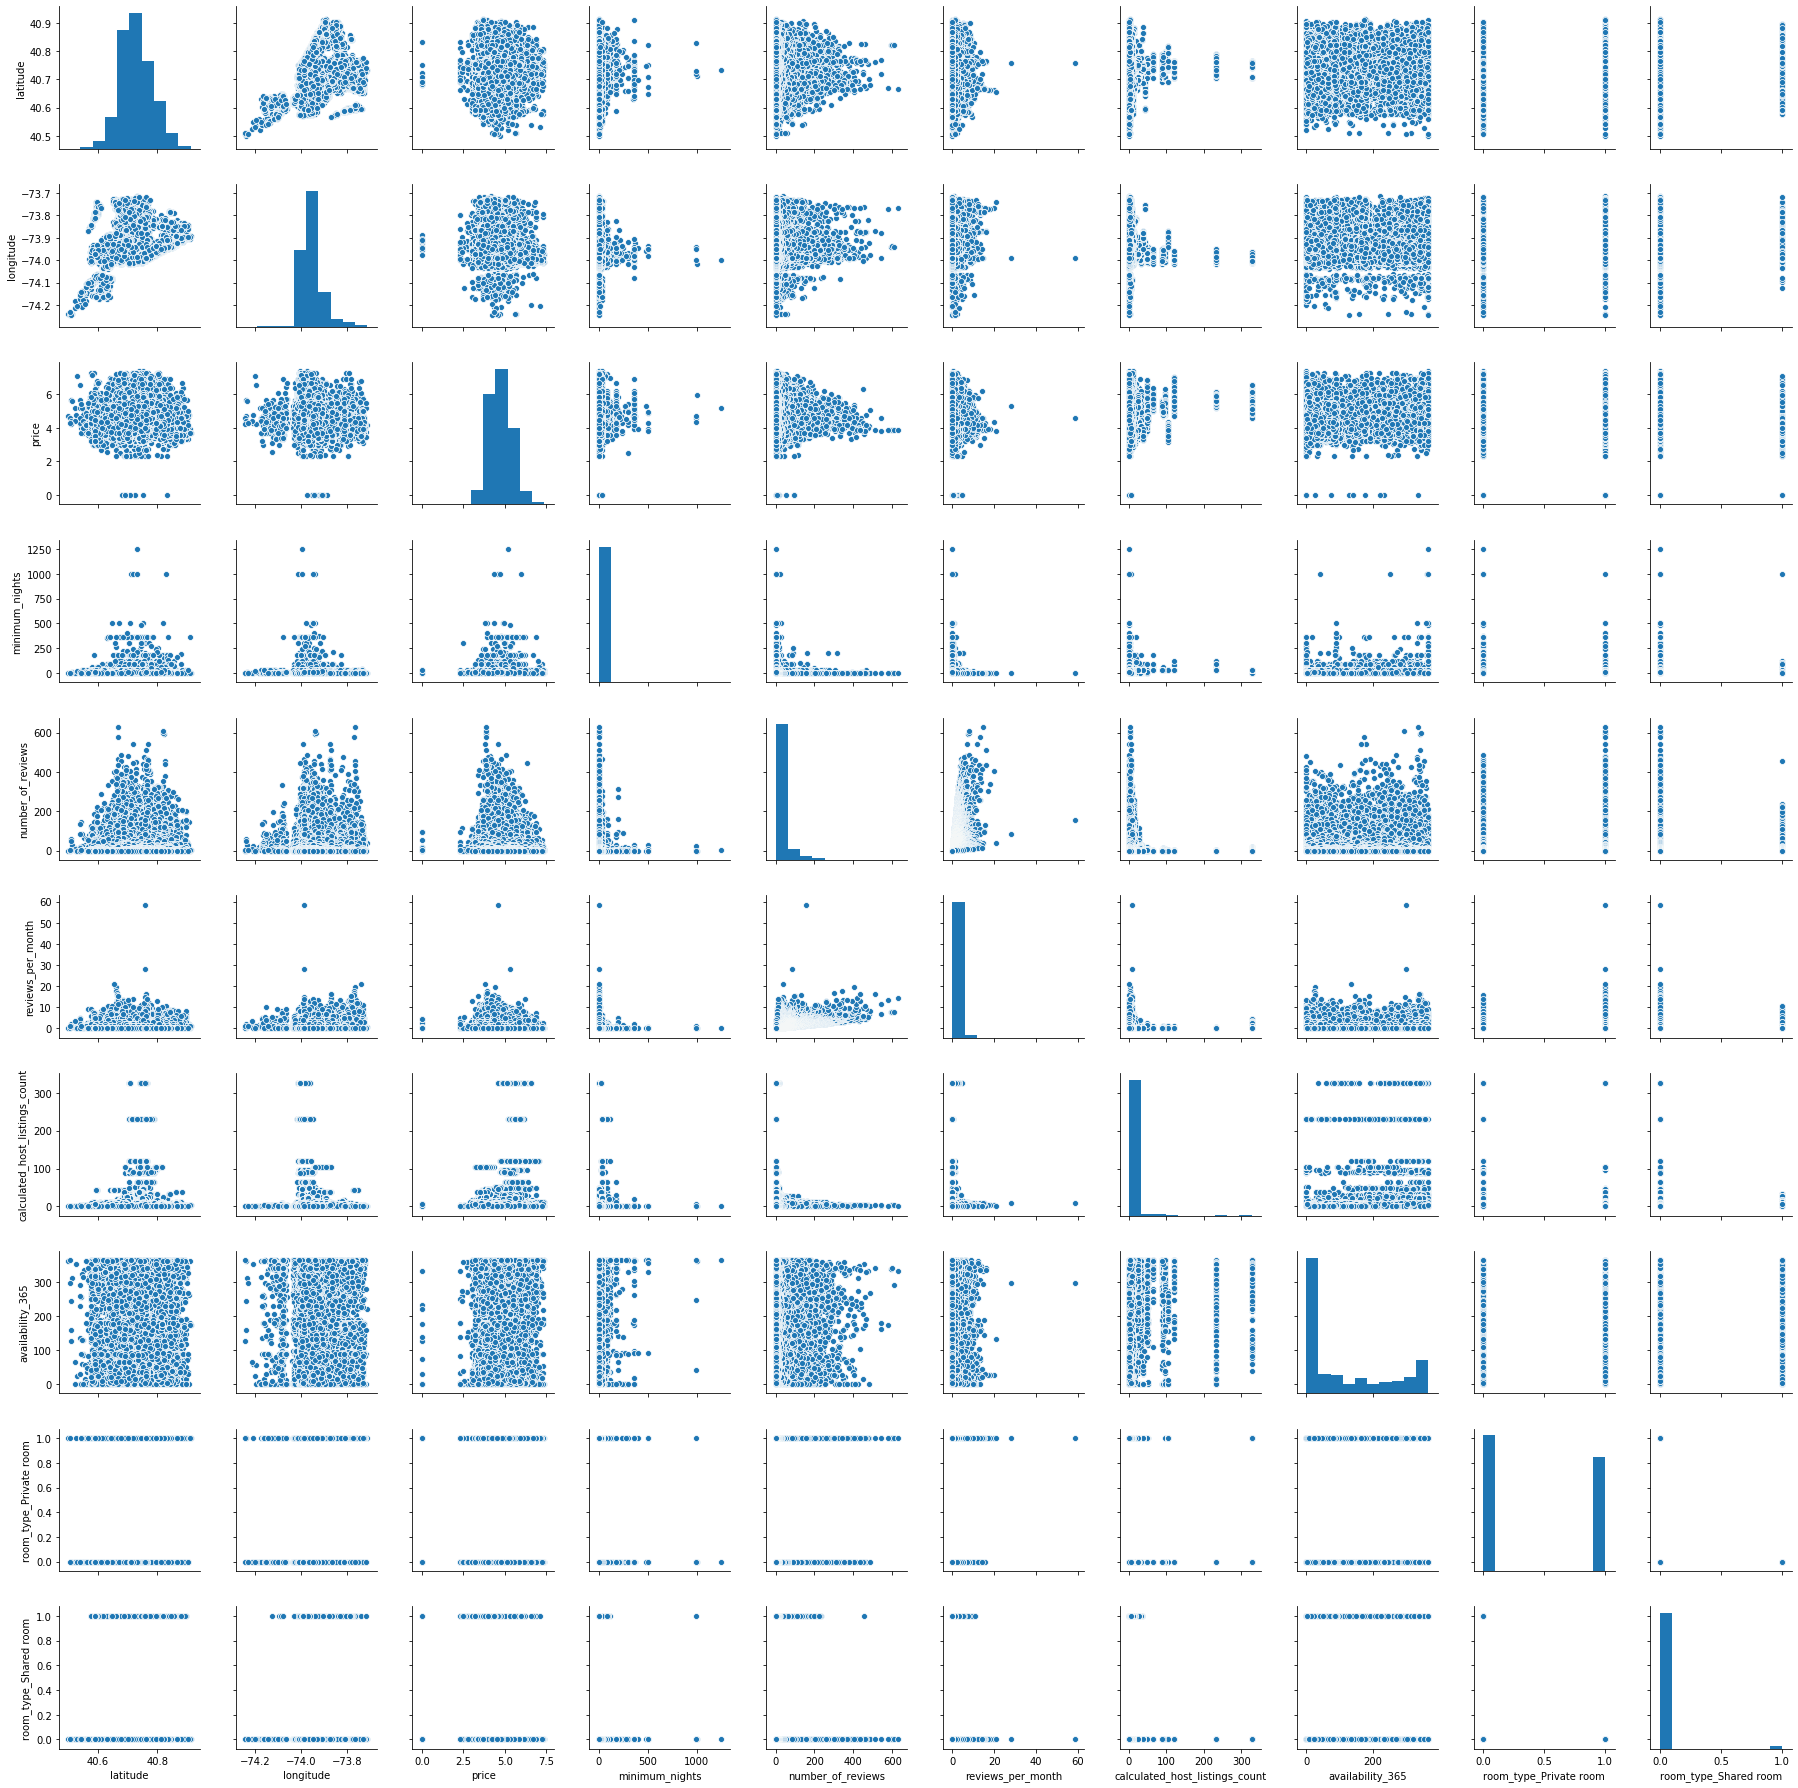

In [32]:
# есть еще над чем поработать, но пока оставим так
# Ok, теперь pairplot, без привнесенных категорий через OHE
data = df_reduced_log_entire.drop(df_reduced_log_entire.filter(regex="neighbourhood_").columns,axis=1)
sns.pairplot(data)

/home/pbedyaev/anaconda2/envs/ml/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/pbedyaev/anaconda2/envs/ml/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


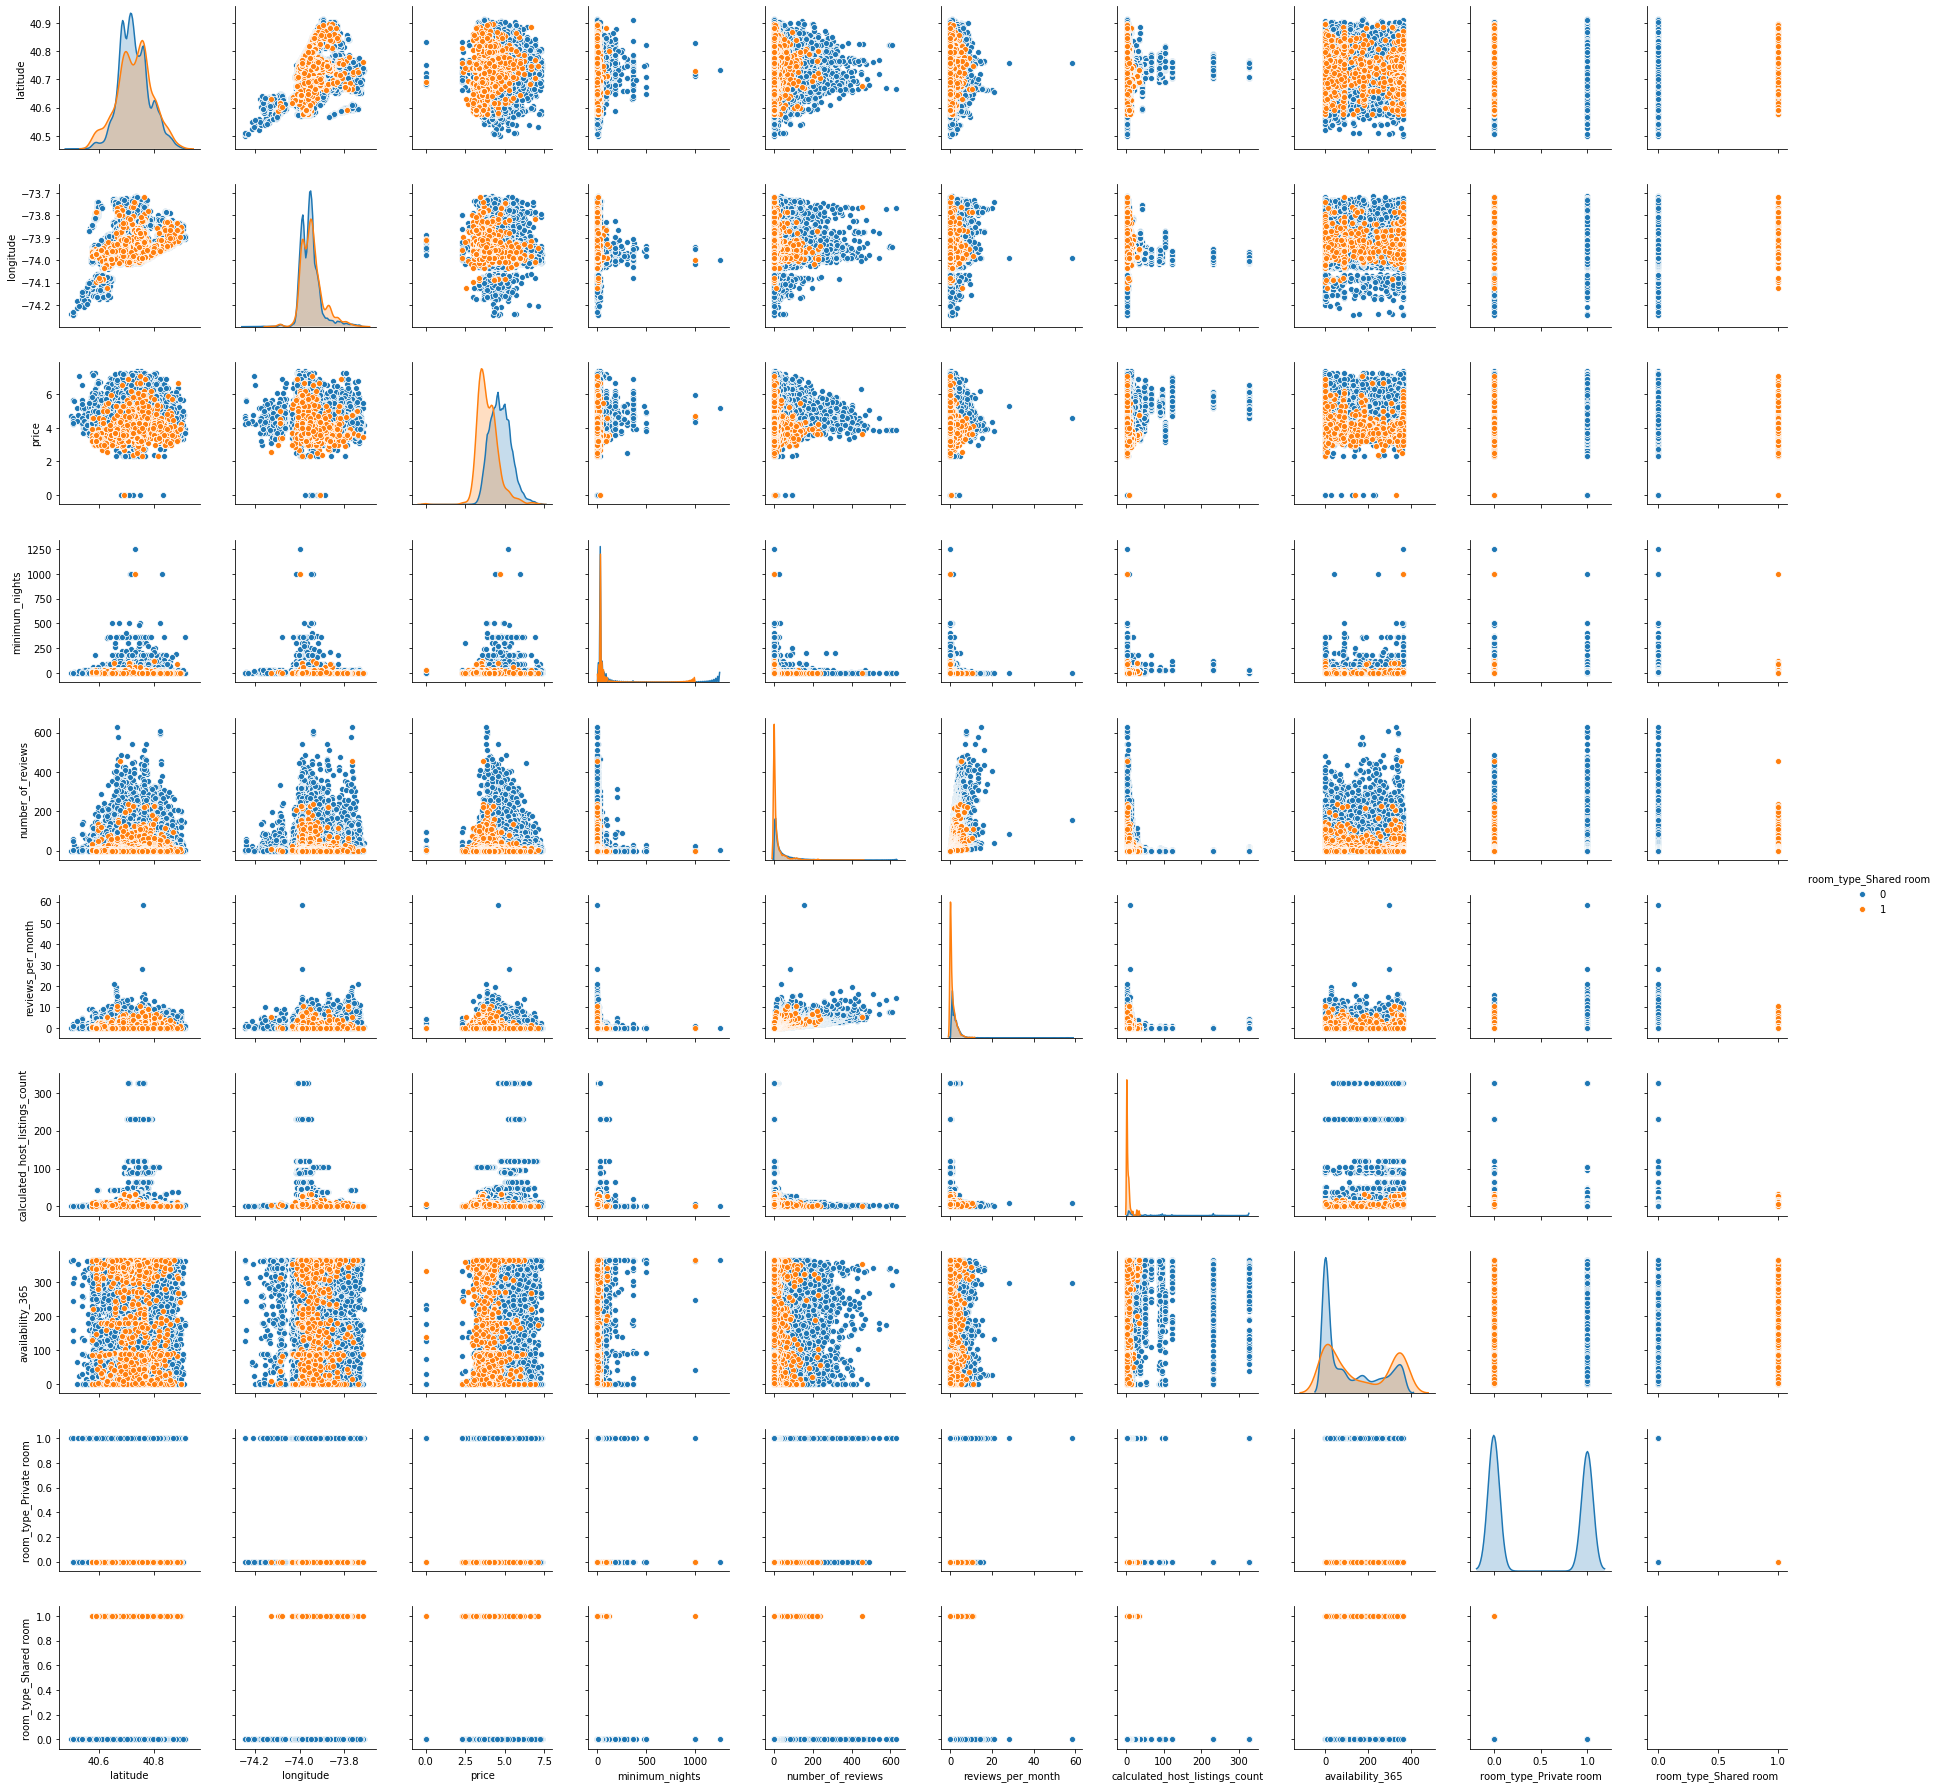

In [33]:
#sns.pairplot(data, hue="room_type_Private room")
sns.pairplot(data, hue="room_type_Shared room")

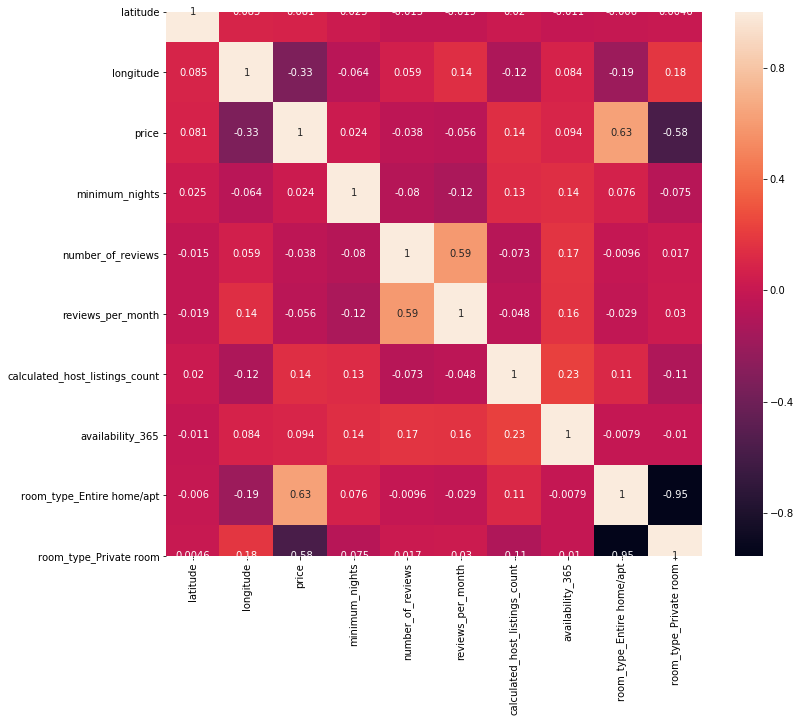

In [34]:
# возвращаемся на исходную
# и посмотрим как будет при исключении "room_type_Shared room"
df_reduced_log_shared = df_reduced_log.drop("room_type_Shared room", axis=1)
hist_list = df_reduced_log_shared.drop(df_reduced_log_shared.filter(regex="neighbourhood_").columns,axis=1)
plt.figure(figsize=(12, 10))
sns.heatmap(hist_list.corr(), annot=True);

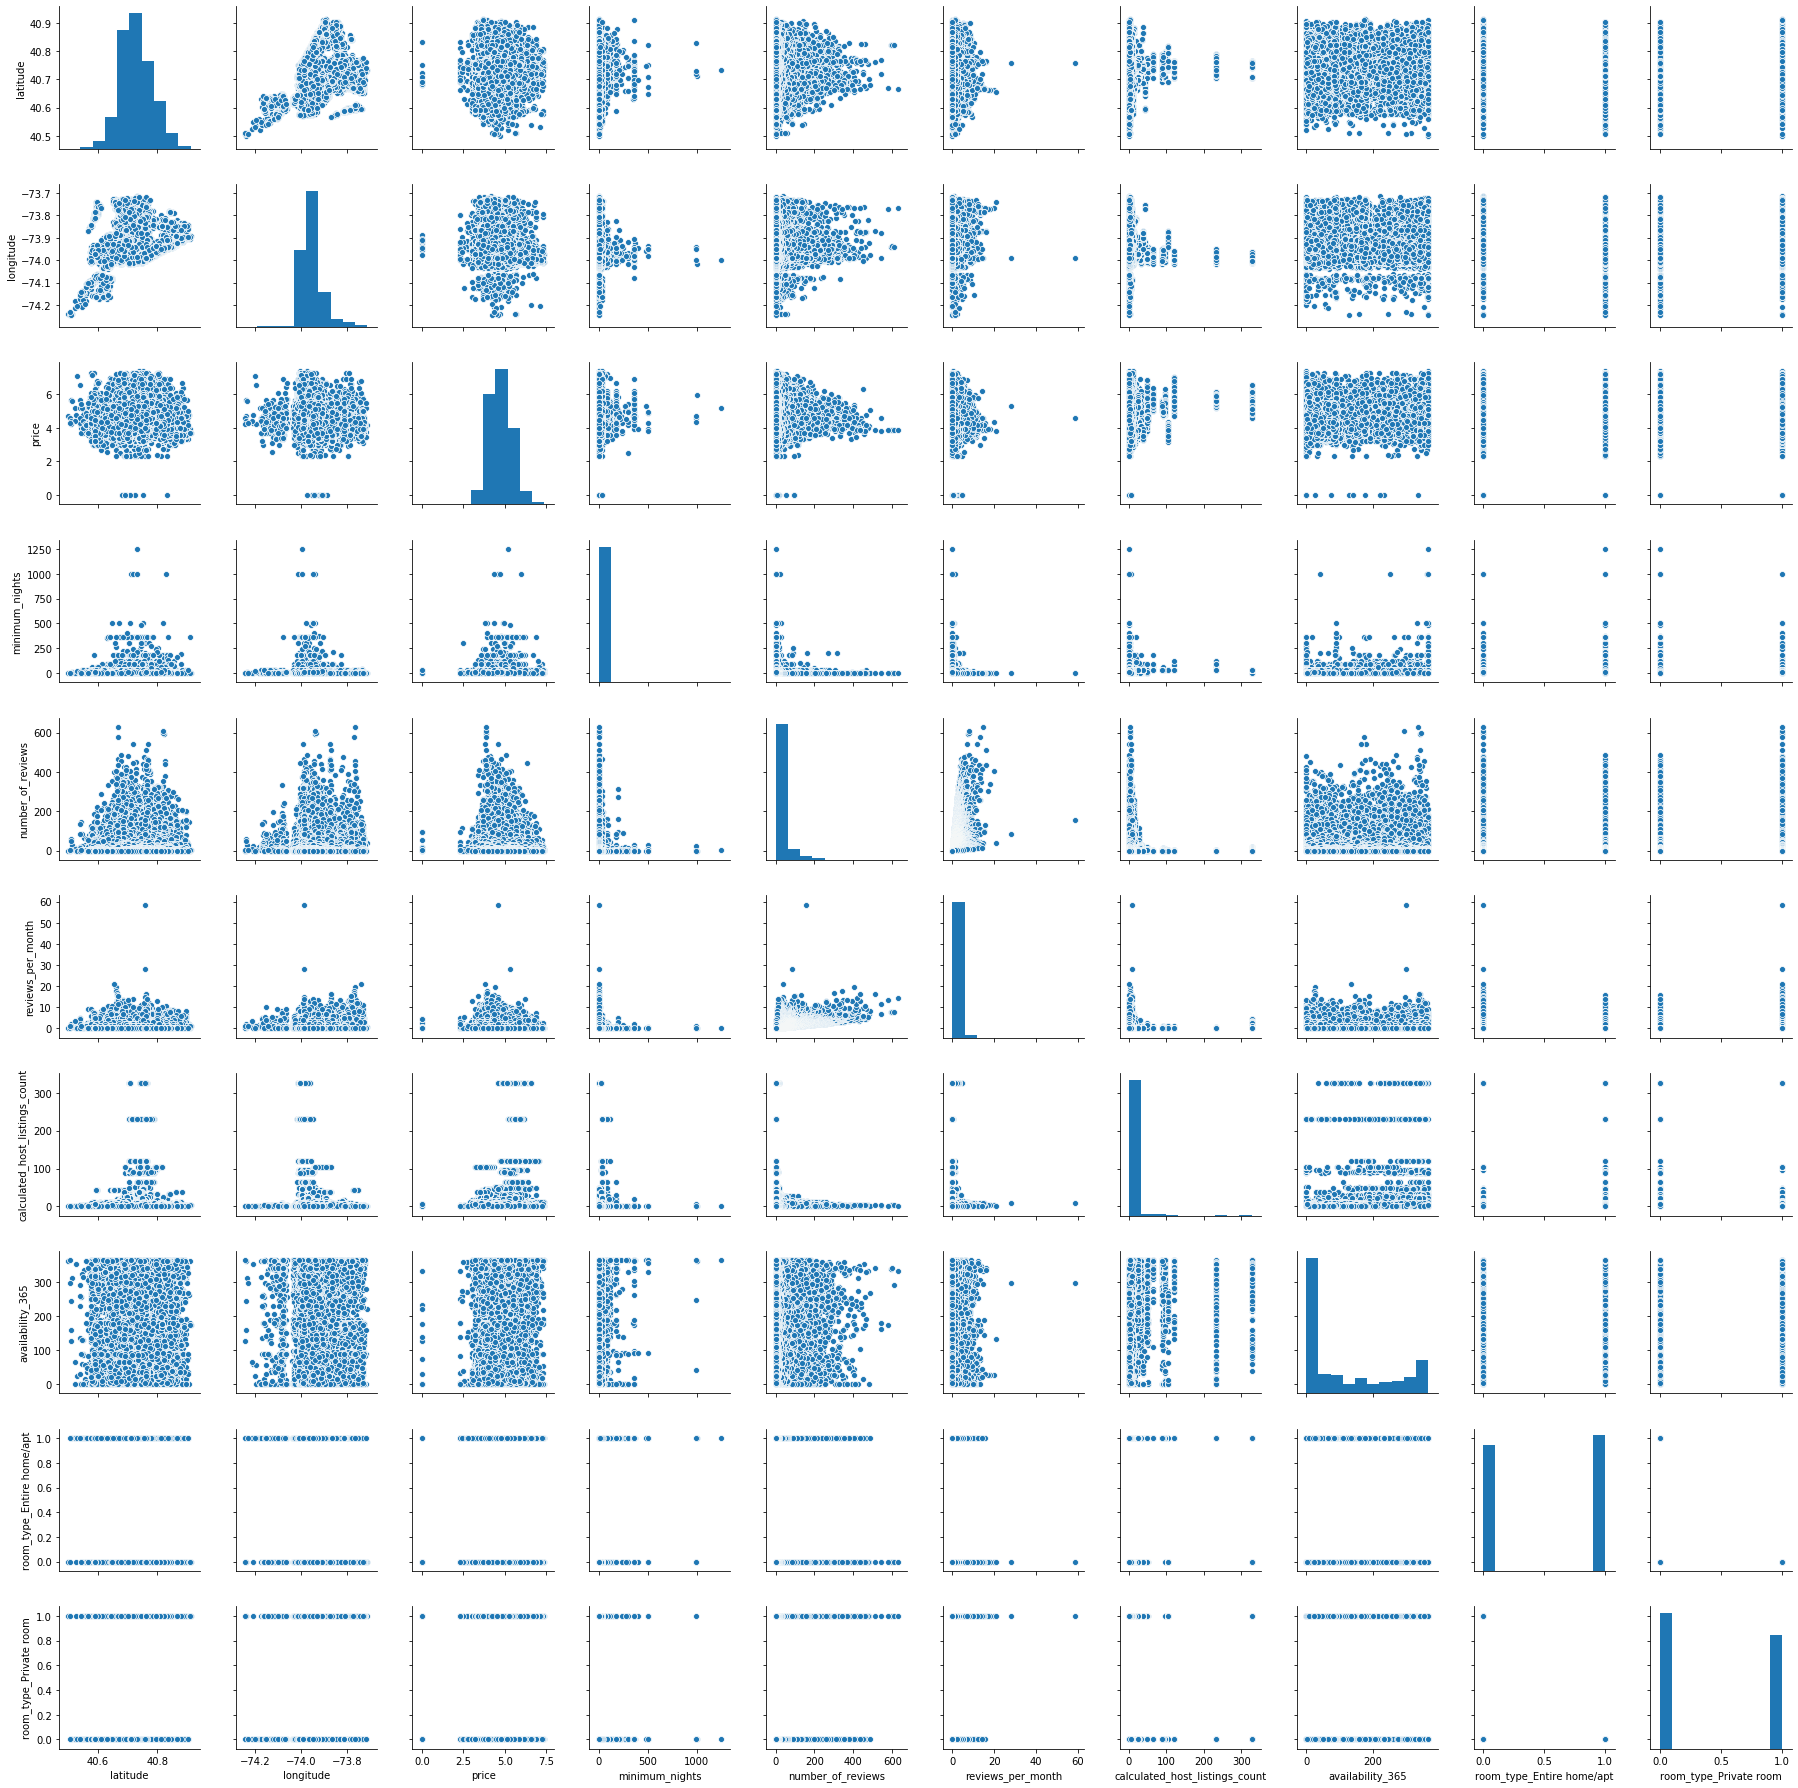

In [35]:
data = df_reduced_log_shared.drop(df_reduced_log_shared.filter(regex="neighbourhood_").columns,axis=1)
sns.pairplot(data)

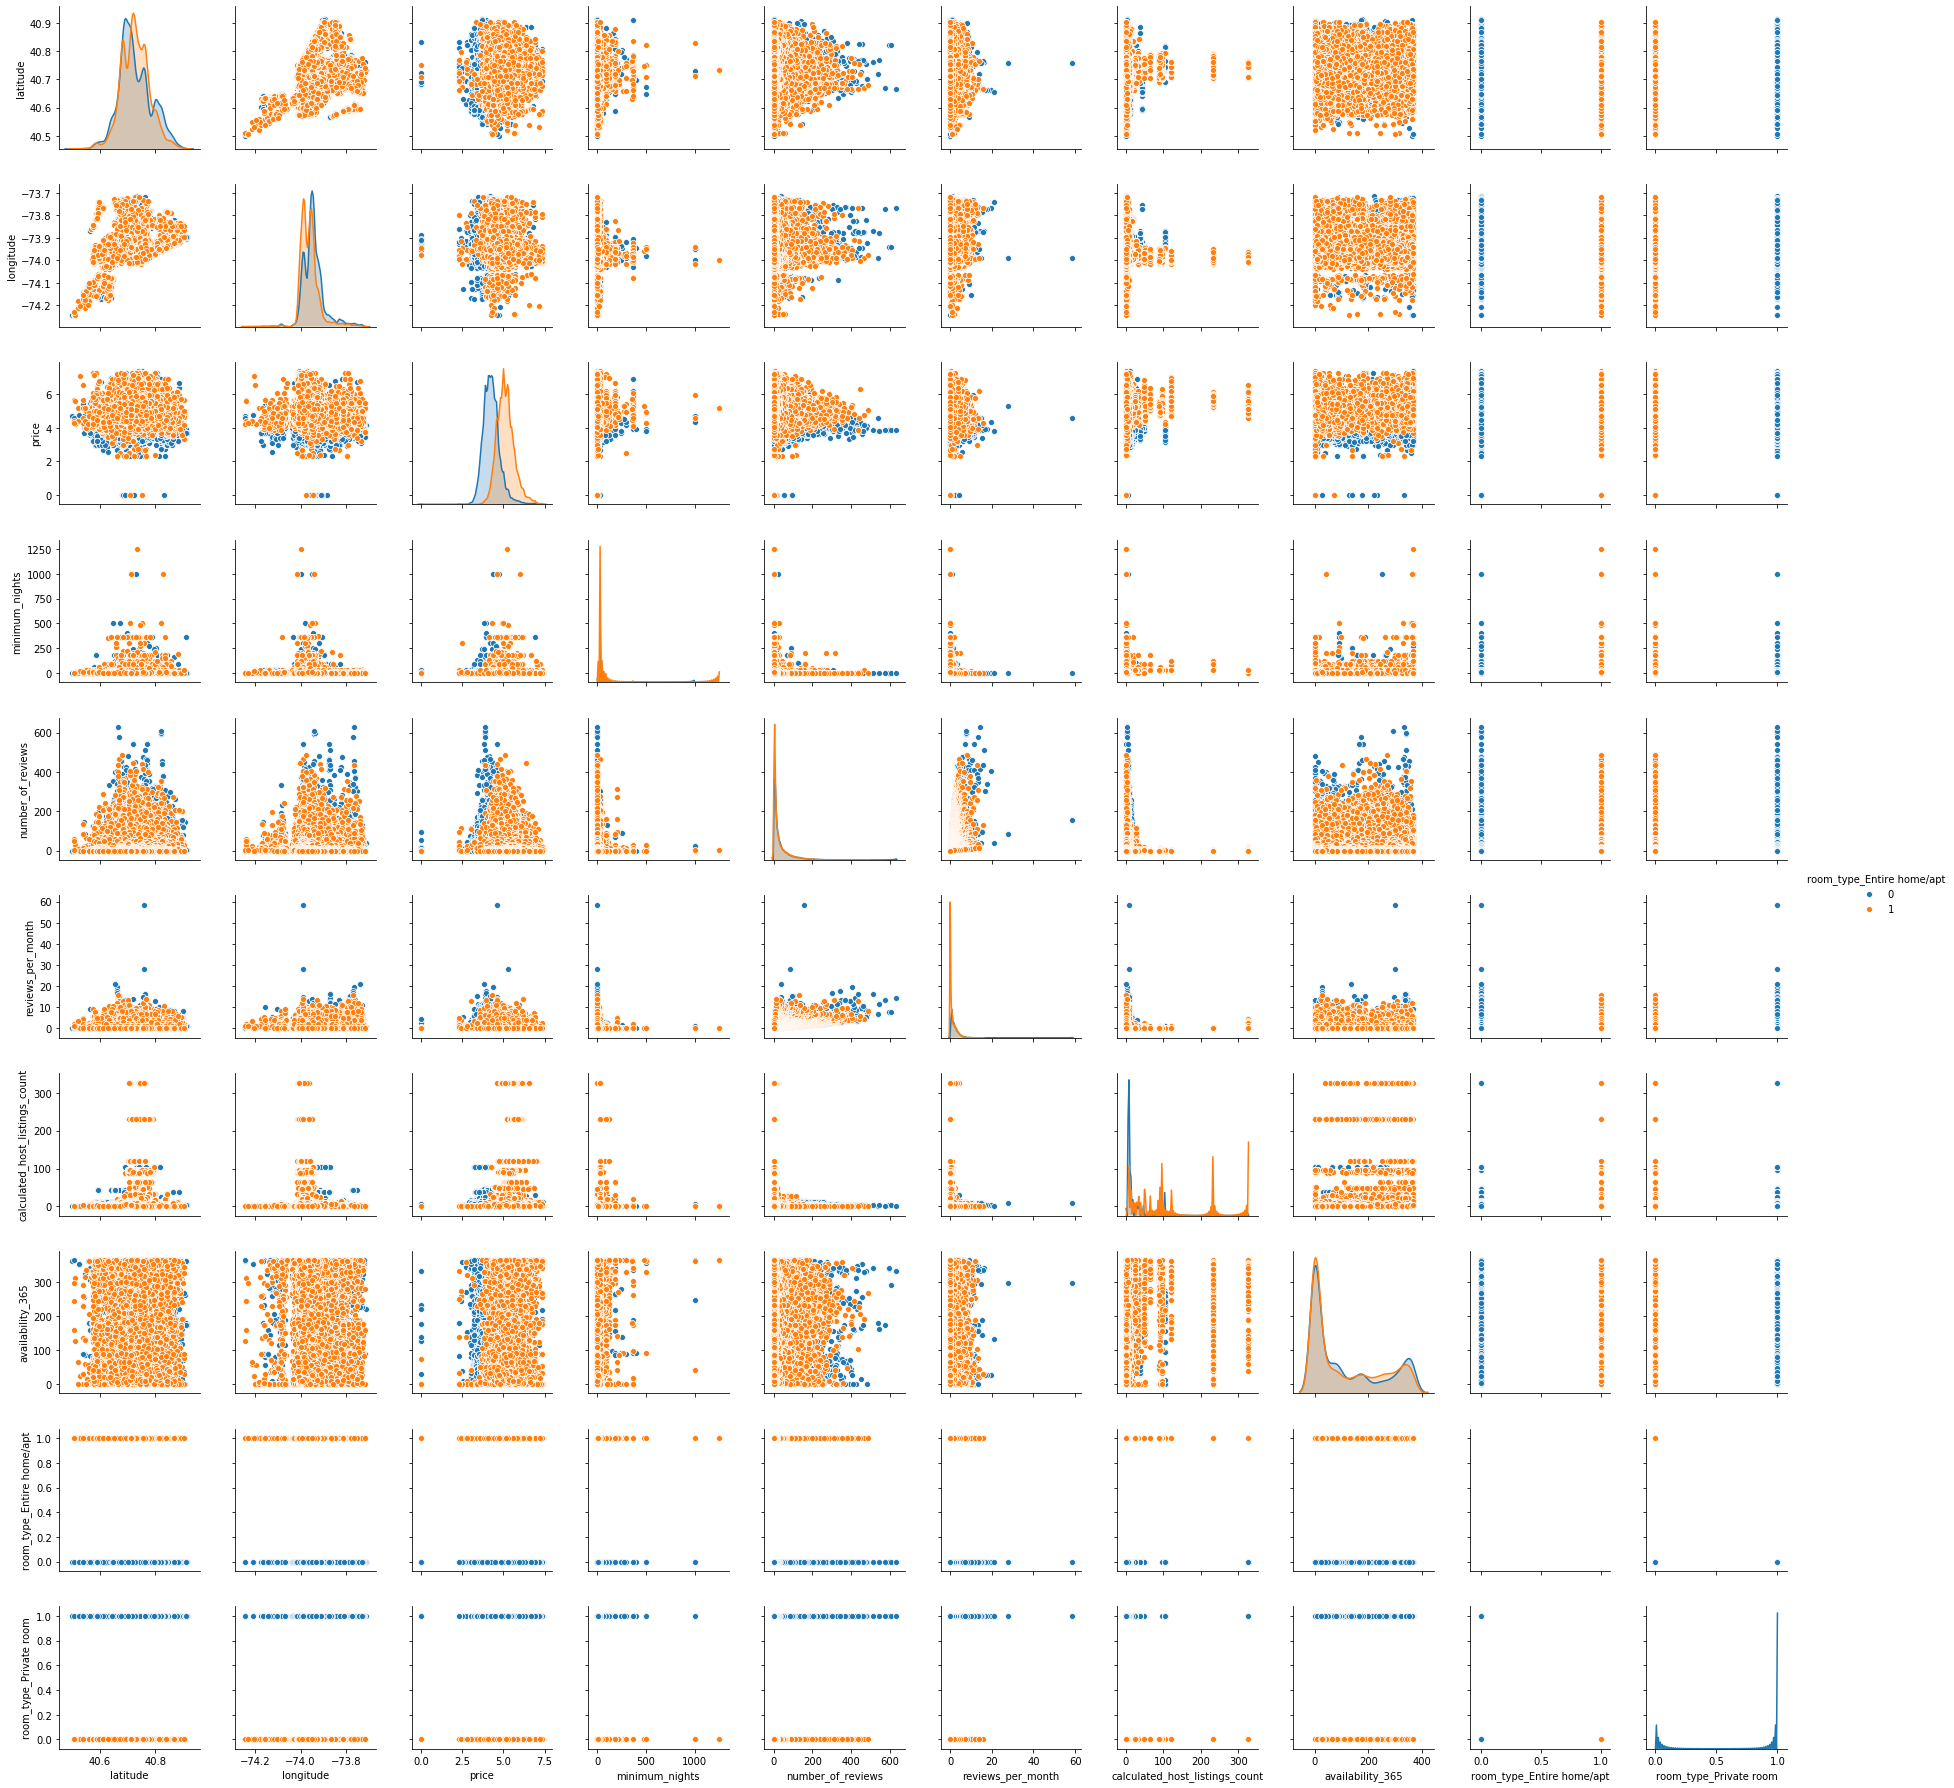

In [36]:
sns.pairplot(data, hue="room_type_Entire home/apt")

In [37]:
# вот тут надо принять решение какие данные выкинуть - несбалансированные или сильно коррелирующие. 
# в этом примере кажется, что лучше выкинуть "room_type_Entire home/apt", 
# поскольку в этом случае данные (судя по графикам) становятся более разделимы
# поэтому убираем "room_type_Entire home/apt" и используем данные в df_reduced_log_entire
hist_list = df_reduced_log_entire.drop(df_reduced_log_entire.filter(regex="neighbourhood_").columns,axis=1)
df_reduced_log_entire.describe()

latitude     longitude         price  minimum_nights  \
count  48759.000000  48759.000000  48759.000000    48759.000000   
mean      40.728939    -73.952104      4.716876        6.983900   
std        0.054552      0.046168      0.680742       20.327114   
min       40.499790    -74.244420      0.000000        1.000000   
25%       40.690060    -73.983015      4.234107        1.000000   
50%       40.723030    -73.955640      4.653960        3.000000   
75%       40.763110    -73.936180      5.164786        5.000000   
max       40.913060    -73.712990      7.377134     1250.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       48759.000000       48759.000000                    48759.000000   
mean           23.326012           1.093216                        7.155910   
std            44.597344           1.598428                       32.997127   
min             0.000000           0.000000                        1.000000   
25%             1.000000           0.040000                        1.000000   
50%             5.000000           0.370000                        1.000000   
75%            24.000000           1.590000                        2.000000   
max           629.000000          58.500000                      327.000000   

       availability_365  neighbourhood_group_Bronx  \
count      48759.000000               48759.000000   
mean         112.576058                   0.022355   
std          131.509714                   0.147836   
min            0.000000                   0.000000   
25%            0.000000                   0.000000   
50%           45.000000                   0.000000   
75%          226.000000                   0.000000   
max          365.000000                   1.000000   

       neighbourhood_group_Brooklyn  ...  neighbourhood_region_Williamsbridge  \
count                  48759.000000  ...                          48759.00000   
mean                       0.411616  ...                              0.00082   
std                        0.492131  ...                              0.02863   
min                        0.000000  ...                              0.00000   
25%                        0.000000  ...                              0.00000   
50%                        0.000000  ...                              0.00000   
75%                        1.000000  ...                              0.00000   
max                        1.000000  ...                              1.00000   

       neighbourhood_region_Williamsburg  neighbourhood_region_Willowbrook  \
count                       48759.000000                      48759.000000   
mean                            0.080293                          0.000021   
std                             0.271749                          0.004529   
min                             0.000000                          0.000000   
25%                             0.000000                          0.000000   
50%                             0.000000                          0.000000   
75%                             0.000000                          0.000000   
max                             1.000000                          1.000000   

       neighbourhood_region_Windsor Terrace  neighbourhood_region_Woodhaven  \
count                          48759.000000                    48759.000000   
mean                               0.003220                        0.001805   
std                                0.056653                        0.042445   
min                                0.000000                        0.000000   
25%                                0.000000                        0.000000   
50%                                0.000000                        0.000000   
75%                                0.000000                        0.000000   
max                                1.000000                        1.000000   

       neighbourhood_region_Woodlawn  neighbourhood_region_Wood

In [38]:
# посмотрим на оставшиеся высокие корреляции
correlations = hist_list.corr()
used_corr_index = []
interesting_corr_index=[]
for i in correlations:
    for j in correlations.index[correlations[i].abs() > 0.5]:
        # if i != j and i not in used_corr_index and j not in used_corr_index:
        if i != j and [i,j] not in used_corr_index and [j,i] not in used_corr_index:
        #if i != j and [i,j] not in used_corr_index:
            used_corr_index.append([i,j])
            print(correlations[i][correlations.index == j].values[0], "  ", i, "  ", j )
            interesting_corr_index.append([i,j,correlations[i][correlations.index == j].values[0]])
            

-0.5754549096666434    price    room_type_Private room
0.5892082204214104    number_of_reviews    reviews_per_month


['price', 'room_type_Private room', -0.5754549096666434]
['number_of_reviews', 'reviews_per_month', 0.5892082204214104]


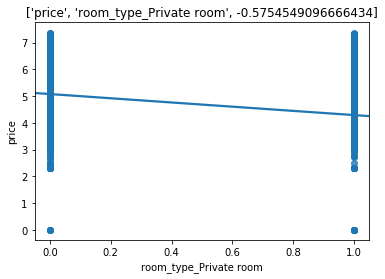

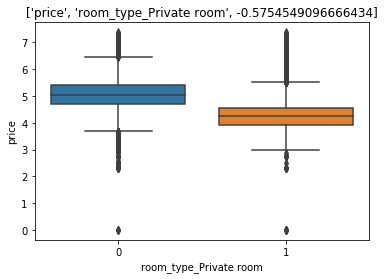

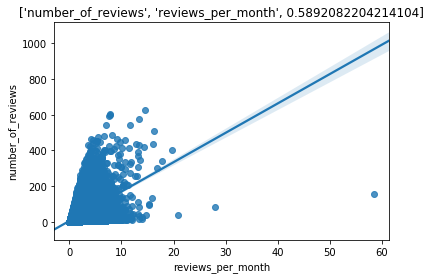

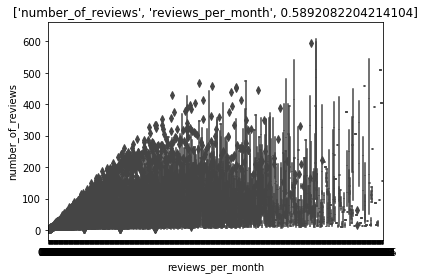

In [39]:
data = df_reduced_log_entire.drop(df_reduced_log_entire.filter(regex="neighbourhood_").columns,axis=1)
for one in interesting_corr_index:
    print(one)
    plt.figure()
    plt.title(one)
    sns.regplot(x=one[1], y=one[0], data=data)
    plt.figure()
    plt.title(one)
    sns.boxplot(x=one[1], y=one[0], data=data)
    

In [40]:
# Ok,теперь готовим тренировочную и тестовую выборки
from sklearn.model_selection import train_test_split
# называемся теперь df_t(est|rain), для последующего единообразия с общепринятыми обозначениями
df_train, df_test = train_test_split(df_reduced_log_entire, test_size = 0.3) # 30% на тесты

In [41]:
# теперь нужно отмасштабировать (нормализовать) непрерывные переменные
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
props_to_scale = (df_reduced_log_entire.drop(df_reduced_log_entire.filter(regex="neighbourhood_").columns,axis=1))\
      .drop(df_reduced_log_entire.filter(regex="room_type_").columns,axis=1)\
      .columns.values
props_to_scale = props_to_scale[props_to_scale != "price"] # remove price from being scaled
print(props_to_scale)

['latitude' 'longitude' 'minimum_nights' 'number_of_reviews'
 'reviews_per_month' 'calculated_host_listings_count' 'availability_365']


In [42]:
scaler.fit(df_train[props_to_scale]) 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [43]:
# Применяем скалировщик к трэйну
df_train_scale = scaler.transform(df_train[props_to_scale])

# Применяем скалирвощик к тесту 
df_test_scale = scaler.transform(df_test[props_to_scale])

In [44]:
# Заменяем значения на отскалированные
df_train[props_to_scale] = df_train_scale
df_test[props_to_scale] = df_test_scale

/home/pbedyaev/anaconda2/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/pbedyaev/anaconda2/envs/ml/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/pbedyaev/anaconda2/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [45]:
df_train.head()

latitude  longitude     price  minimum_nights  number_of_reviews  \
id                                                                           
13563330  1.819085   0.065733  3.583519        0.373861          -0.518283   
16514949 -0.224224  -0.951978  5.075174       -0.207633           0.372234   
21427176  0.729955  -0.969479  5.662960       -0.207633           0.951071   
34470950  0.209743  -1.112991  5.293305       -0.313359          -0.518283   
31125134  0.260464  -0.682236  4.787492       -0.207633          -0.317917   

          reviews_per_month  calculated_host_listings_count  availability_365  \
id                                                                              
13563330          -0.687442                       -0.187132         -0.852770   
16514949           0.163303                       -0.157207          0.091334   
21427176           1.467777                       -0.157207          1.431352   
34470950          -0.687442                       -0.097356          1.850107   
31125134           0.213717                       -0.187132         -0.852770   

          neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  ...  \
id                                                                 ...   
13563330                          0                             0  ...   
16514949                          0                             0  ...   
21427176                          0                             0  ...   
34470950                          0                             0  ...   
31125134                          0                             0  ...   

          neighbourhood_region_Williamsbridge  \
id                                              
13563330                                    0   
16514949                                    0   
21427176                                    0   
34470950                                    0   
31125134                                    0   

          neighbourhood_region_Williamsburg  neighbourhood_region_Willowbrook  \
id                                                                              
13563330                                  0                                 0   
16514949                                  0                                 0   
21427176                                  0                                 0   
34470950                                  0                                 0   
31125134                                  0                                 0   

          neighbourhood_region_Windsor Terrace  \
id                                               
13563330                                     0   
16514949                                     0   
21427176                                     0   
34470950                                     0   
31125134                                     0   

          neighbourhood_region_Woodhaven  neighbourhood_region_Woodlawn  \
id                                                                        
13563330                               0                              0   
16514949                               0                              0   
21427176                               0                              0   
34470950                               0                              0   
31125134                               0                              0   

          neighbourhood_region_Woodrow  neighbourhood_region_Woodside  \
id                                                                      
13563330                             0                              0   
16514949                             0                              0   
21427176                             0                              0   
34470950                             0                              0   
31125134                             0                              0   

          room_type_Private room  room_type_Shared room  
id               

In [46]:
print(df_train.shape) # Посмотрим на размеры трэйна и теста 
print(df_test.shape)  

(34131, 236)
(14628, 236)


In [47]:
# Вытаскиваем цены и параметры квартир по разным переменным для удобства 

y_train = df_train.price 
y_test = df_test.price 

x_train = df_train.drop('price', axis=1).get_values()
x_test = df_test.drop('price', axis=1).get_values()

y_test.head()

/home/pbedyaev/anaconda2/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.
  
/home/pbedyaev/anaconda2/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.
  import sys


id
9112240     5.220356
26318555    5.579730
16565202    4.317488
1617443     4.442651
34036047    6.309918
Name: price, dtype: float64

In [48]:
y_mean = np.mean(y_train)                     # посчитали среднее 
y_pred_naive = np.ones(len(y_test)) * y_mean  # спрогнозировали им цену всех квартир в тестовой выборке
y_pred_naive[:5]

array([4.71788236, 4.71788236, 4.71788236, 4.71788236, 4.71788236])

In [49]:
# и не забыли что цена в логарифмической шкале. Чтобы получить доллары, exp(n)
np.exp(y_pred_naive[0]) # $

111.93097225145476

In [50]:
# теперь будем оценивать насколько плох прогноз
from sklearn import metrics  # подгружаем метрики
metrics.mean_absolute_error(y_test, y_pred_naive) # MAE для логарифмической шкалы

0.5498087393592842

In [51]:
metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred_naive)) # MAE $

75.28496295300413

In [52]:
metrics.mean_squared_error(y_test, y_pred_naive) # MSE square logs 

0.46967600056833136

In [53]:
metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred_naive)) # MSE в квадратных долларах

16990.383857007735

In [54]:
np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred_naive))) # RMSE в квадратных долларах

130.34716666275386

In [55]:
np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred_naive))) # RMSE в обычных долларах

130.34716666275386

In [56]:
def mean_absolute_percentage_error(y_true, y_pred): # общий случай, exp() применяем вручную перед MAPE
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / (y_true))) * 100 # 
    return mape

In [57]:

mean_absolute_percentage_error(np.exp(y_test), np.exp(y_pred_naive)) # это проценты

65.95592199336575

In [58]:
metrics.r2_score(np.exp(y_test), np.exp(y_pred_naive))

-0.06185994467605682

In [59]:
def print_metrics(y_test,y_pred):
    print('MAE:', metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred)))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred))))
    print('R2:',  metrics.r2_score(np.exp(y_test), np.exp(y_pred)))
    print('MAPE:', mean_absolute_percentage_error(np.exp(y_test), np.exp(y_pred)))
    pass
def dataframe_metrics(y_test,y_pred):
    stats = [
        metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred)),
        np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred))),
        metrics.r2_score(np.exp(y_test), np.exp(y_pred)),
        mean_absolute_percentage_error(np.exp(y_test), np.exp(y_pred))
    ]
    return stats
measured_metrics = pd.DataFrame({"error_type":["MAE", "RMSE", "R2", "MAPE"]})
measured_metrics.set_index("error_type")

Empty DataFrame
Columns: []
Index: [MAE, RMSE, R2, MAPE]

In [60]:
print_metrics(y_test, y_pred_naive)
measured_metrics["naive"] = dataframe_metrics(y_test, y_pred_naive)
measured_metrics

MAE: 75.28496295300413
RMSE: 130.34716666275386
R2: -0.06185994467605682
MAPE: 65.95592199336575


error_type       naive
0        MAE   75.284963
1       RMSE  130.347167
2         R2   -0.061860
3       MAPE   65.955922

In [61]:
from sklearn.linear_model import LinearRegression

# Объявили модель
model_regression = LinearRegression()

# Обучили модель на тренировочной выборке 
model_regression.fit(x_train, y_train)

# Сделали прогнозы на тестовой выборке 
y_pred_regr = model_regression.predict(x_test)

In [62]:
# модель ведет себя странно
y_pred_regr.max() # тут очень большое число, exp(5889322352.642151) от него не влезает в float64

108445938.77678204

In [63]:
# print_metrics(y_test,y_pred_regr)# не будет работать, слишком большое число

/home/pbedyaev/anaconda2/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


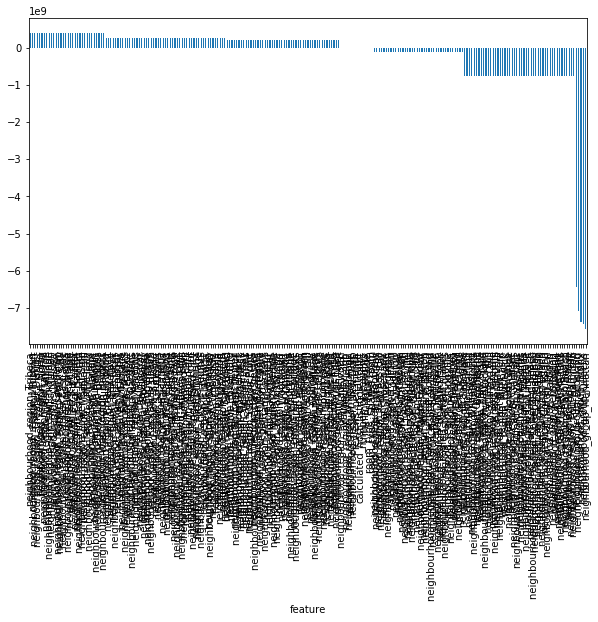

In [64]:
featureImportance = pd.DataFrame({"feature": df_reduced_log_entire.drop('price',axis=1).columns, 
                                  "importance": model_regression.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(10, 6));

In [65]:
# Ok, попробуем убрать лишние данные. Дропнем neighbourhood_region 
# т.к. их очень много и это всего лишь более мелкое разбиение по географии.
df = df_reduced_log_entire.drop(df_reduced_log_entire.filter(regex="neighbourhood_region").columns,axis=1)

In [66]:
scaler1 = StandardScaler()
props_to_scale = (df_reduced_log_entire.drop(df_reduced_log_entire.filter(regex="neighbourhood_").columns,axis=1))\
      .drop(df_reduced_log_entire.filter(regex="room_type_").columns,axis=1)\
      .columns.values
props_to_scale = props_to_scale[props_to_scale != "price"] # remove price from being scaled
print(props_to_scale)

['latitude' 'longitude' 'minimum_nights' 'number_of_reviews'
 'reviews_per_month' 'calculated_host_listings_count' 'availability_365']


In [67]:
df_train, df_test = train_test_split(df, test_size = 0.3) # 30% на тесты
scaler.fit(df_train[props_to_scale]) 
df_train_scale = scaler.transform(df_train[props_to_scale])
df_test_scale = scaler.transform(df_test[props_to_scale])
df_train[props_to_scale] = df_train_scale
df_test[props_to_scale] = df_test_scale
print(df_train.shape)
print(df_test.shape)  

(34131, 15)
(14628, 15)


/home/pbedyaev/anaconda2/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/pbedyaev/anaconda2/envs/ml/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/pbedyaev/anaconda2/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [68]:
y_train = df_train.price 
y_test = df_test.price 

x_train = df_train.drop('price', axis=1).get_values()
x_test = df_test.drop('price', axis=1).get_values()

y_test.head()

/home/pbedyaev/anaconda2/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.
  after removing the cwd from sys.path.
/home/pbedyaev/anaconda2/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.
  """


id
21898567    3.912023
8889423     5.010635
31295741    5.560682
4791542     3.737670
32237634    6.066108
Name: price, dtype: float64

In [69]:
y_mean = np.mean(y_train)                     # посчитали среднее 
y_pred_naive = np.ones(len(y_test)) * y_mean  # спрогнозировали им цену всех квартир в тестовой выборке
y_pred_naive[:5]

array([4.71411963, 4.71411963, 4.71411963, 4.71411963, 4.71411963])

In [70]:
print_metrics(y_test, y_pred_naive)

MAE: 75.88580337934847
RMSE: 133.779872939239
R2: -0.06590615325255644
MAPE: 62.23964919257068


In [71]:
model_regression = LinearRegression()

# Обучили модель на тренировочной выборке 
model_regression.fit(x_train, y_train)

# Сделали прогнозы на тестовой выборке 
y_pred_regr = model_regression.predict(x_test)

In [72]:
# print_metrics(y_test,y_pred_regr)
measured_metrics["regr"] = dataframe_metrics(y_test, y_pred_regr)
measured_metrics

error_type       naive        regr
0        MAE   75.284963   54.587842
1       RMSE  130.347167  111.865727
2         R2   -0.061860    0.254699
3       MAPE   65.955922   37.398752

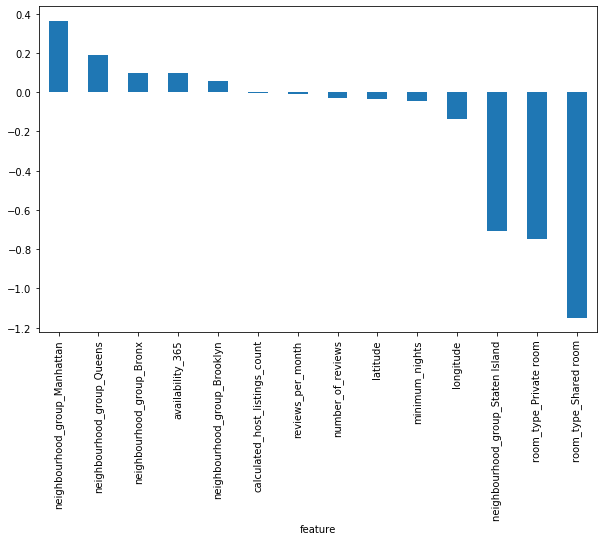

In [73]:
featureImportance = pd.DataFrame({"feature": df.drop('price',axis=1).columns, 
                                  "importance": model_regression.coef_})
featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar', figsize=(10, 6));

In [74]:
# Lasso
from sklearn.linear_model import Lasso

# Объявили модель
model_simplelasso = Lasso()

# Обучили модель на тренировочной выборке 
model_simplelasso.fit(x_train, y_train)

# Сделали прогнозы на тестовой выборке 
y_pred_lasso = model_simplelasso.predict(x_test)

In [75]:
# print_metrics(y_test,y_pred_lasso) # цифры = константному прогнозу, наказание велико, надо подобрать alpha.
measured_metrics["lasso"] = dataframe_metrics(y_test, y_pred_lasso)
measured_metrics

error_type       naive        regr       lasso
0        MAE   75.284963   54.587842   75.885803
1       RMSE  130.347167  111.865727  133.779873
2         R2   -0.061860    0.254699   -0.065906
3       MAPE   65.955922   37.398752   62.239649

In [76]:
print(model_simplelasso.coef_) # не обучилась, надо подбирать гиперпараметр

[ 0. -0.  0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0.]


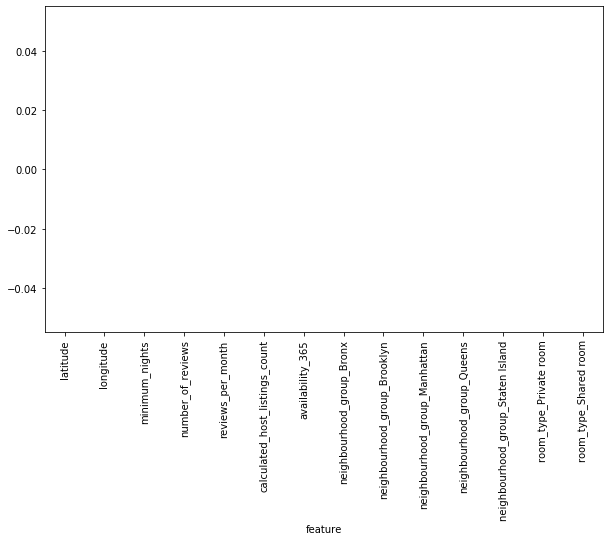

In [77]:
featureImportance = pd.DataFrame({"feature": df.drop('price',axis=1).columns, 
                                  "importance": model_simplelasso.coef_})
featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar', figsize=(10, 6));

In [78]:
# гридом ищем лучший alpha:
from sklearn.model_selection import GridSearchCV

# Решётака для перебора параметра 
param_grid = {'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 0.8, 1, 5, 10]}

# Объявили модель 
model_lasso = Lasso() 

# Объявили перебор 
grid_cv_lasso = GridSearchCV(model_lasso, param_grid, cv = 5)
grid_cv_lasso.fit(x_train, y_train)
print('Лучшее значение параметра:', grid_cv_lasso.best_params_)

# Сделали прогнозы
y_pred_lasso = grid_cv_lasso.predict(x_test)

Лучшее значение параметра: {'alpha': 0.001}


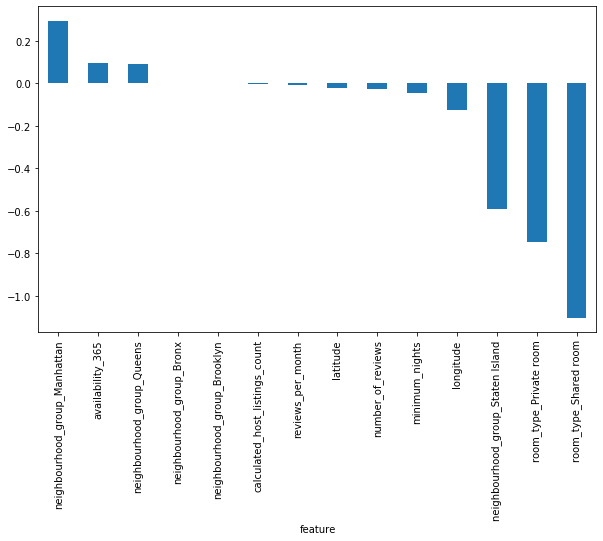

In [79]:
featureImportance = pd.DataFrame({"feature": df.drop('price',axis=1).columns, 
                                  "importance": grid_cv_lasso.best_estimator_.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar', figsize=(10, 6));

In [80]:
# print_metrics(y_test,y_pred_lasso)
measured_metrics["lasso_cv_grid"] = dataframe_metrics(y_test, y_pred_lasso)
measured_metrics

error_type       naive        regr       lasso  lasso_cv_grid
0        MAE   75.284963   54.587842   75.885803      54.583578
1       RMSE  130.347167  111.865727  133.779873     112.080054
2         R2   -0.061860    0.254699   -0.065906       0.251841
3       MAPE   65.955922   37.398752   62.239649      37.432739

In [81]:
# и то же самое только без грида, с кросс-валидацией
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv=5)
lasso_cv.fit(x_train, y_train)
print('Лучшее значение параметра:', lasso_cv.alpha_)

# Сделали прогнозы
y_pred_lasso_cv = lasso_cv.predict(x_test)

Лучшее значение параметра: 0.00022156324644096722


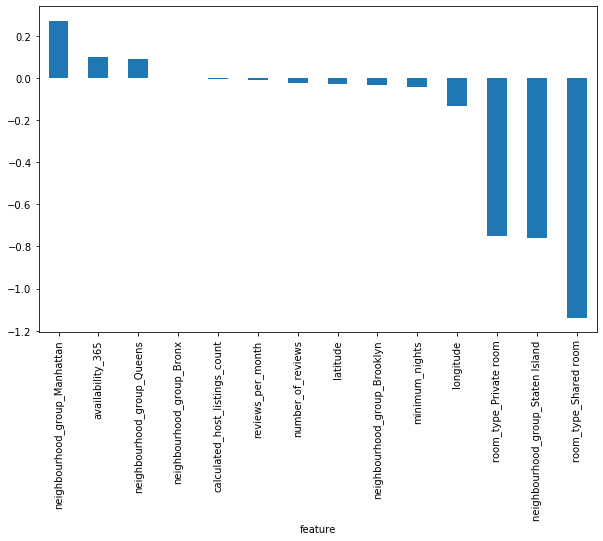

In [82]:
featureImportance = pd.DataFrame({"feature": df.drop('price',axis=1).columns, 
                                  "importance": lasso_cv.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar', figsize=(10, 6));

In [83]:
# print_metrics(y_test, y_pred_lasso_cv)
measured_metrics["lasso_cv_only"] = dataframe_metrics(y_test, y_pred_lasso_cv)
measured_metrics

error_type       naive        regr       lasso  lasso_cv_grid  lasso_cv_only
0        MAE   75.284963   54.587842   75.885803      54.583578      54.582496
1       RMSE  130.347167  111.865727  133.779873     112.080054     111.910693
2         R2   -0.061860    0.254699   -0.065906       0.251841       0.254100
3       MAPE   65.955922   37.398752   62.239649      37.432739      37.400776